In [101]:
# Jump-Start Example: Python analysis of MSPA Software Survey

# Update 2017-09-21 by Tom Miller and Kelsey O'Neill
# Update 2018-06-30 by Tom Miller v005 transformation code added

# tested under Python 3.6.1 :: Anaconda custom (x86_64)
# on Windows 10.0 and Mac OS Sierra 10.12.2 

# shows how to read in data from a comma-delimited text file
# manipuate data, create new count variables, define categorical variables,
# work with dictionaries and lambda mapping functions for recoding data 

# visualizations in this program are routed to external pdf files
# so they may be included in printed or electronic reports

# prepare for Python version 3x features and functions
# these two lines of code are needed for Python 2.7 only
# commented out for Python 3.x versions
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip

# external libraries for visualizations and data manipulation
# ensure that these packages have been installed prior to calls
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map


In [102]:

# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)



In [103]:

# read in comma-delimited text file, creating a pandas DataFrame object
# note that IPAddress is formatted as an actual IP address
# but is actually a random-hash of the original IP address
valid_survey_input = pd.read_csv('mspa-survey-data.csv')



In [104]:
valid_survey_input.head()

,RespondentID,Personal_JavaScalaSpark,Personal_JavaScriptHTMLCSS,Personal_Python,Personal_R,Personal_SAS,Professional_JavaScalaSpark,Professional_JavaScriptHTMLCSS,Professional_Python,Professional_R,...,PREDICT453,PREDICT454,PREDICT455,PREDICT456,PREDICT457,OtherPython,OtherR,OtherSAS,Other,Graduate_Date
0,5135740122,0,0,0,50,50,0,0,0,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5133300037,10,10,50,30,0,25,25,30,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring 2018
2,5132253300,20,0,40,40,0,0,0,40,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2018
3,5132096630,10,10,25,35,20,10,10,25,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2017
4,5131990362,20,0,0,70,10,20,0,0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS-435 with Weka,Fall 2018


In [105]:
# use the RespondentID as label for the rows... the index of DataFrame
valid_survey_input.set_index('RespondentID', drop = True, inplace = True)


In [106]:

# examine the structure of the DataFrame object
print('\nContents of initial survey data ---------------')



Contents of initial survey data ---------------


In [107]:

# could use len() or first index of shape() to get number of rows/observations
print('\nNumber of Respondents =', len(valid_survey_input)) 



Number of Respondents = 207


In [108]:

# show the column/variable names of the DataFrame
# note that RespondentID is no longer present
print(valid_survey_input.columns)


Index(['Personal_JavaScalaSpark', 'Personal_JavaScriptHTMLCSS',
       'Personal_Python', 'Personal_R', 'Personal_SAS',
       'Professional_JavaScalaSpark', 'Professional_JavaScriptHTMLCSS',
       'Professional_Python', 'Professional_R', 'Professional_SAS',
       'Industry_JavaScalaSpark', 'Industry_JavaScriptHTMLCSS',
       'Industry_Python', 'Industry_R', 'Industry_SAS',
       'Python_Course_Interest', 'Foundations_DE_Course_Interest',
       'Analytics_App_Course_Interest', 'Systems_Analysis_Course_Interest',
       'Courses_Completed', 'PREDICT400', 'PREDICT401', 'PREDICT410',
       'PREDICT411', 'PREDICT413', 'PREDICT420', 'PREDICT422', 'PREDICT450',
       'PREDICT451', 'PREDICT452', 'PREDICT453', 'PREDICT454', 'PREDICT455',
       'PREDICT456', 'PREDICT457', 'OtherPython', 'OtherR', 'OtherSAS',
       'Other', 'Graduate_Date'],
      dtype='object')


In [109]:

# abbreviated printing of the first five rows of the data frame
print(pd.DataFrame.head(valid_survey_input)) 


              Personal_JavaScalaSpark  Personal_JavaScriptHTMLCSS  \
RespondentID                                                        
5135740122                          0                           0   
5133300037                         10                          10   
5132253300                         20                           0   
5132096630                         10                          10   
5131990362                         20                           0   

              Personal_Python  Personal_R  Personal_SAS  \
RespondentID                                              
5135740122                  0          50            50   
5133300037                 50          30             0   
5132253300                 40          40             0   
5132096630                 25          35            20   
5131990362                  0          70            10   

              Professional_JavaScalaSpark  Professional_JavaScriptHTMLCSS  \
RespondentID             

In [110]:

# shorten the variable/column names for software preference variables
survey_df = valid_survey_input.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Python',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS'})
    



In [117]:
# define subset DataFrame for analysis of software preferences 
software_df = survey_df.loc[:, 'My_Java':'Ind_SAS']
software_df.head()

,My_Java,My_JS,My_Python,My_R,My_SAS,Prof_Java,Prof_JS,Prof_Python,Prof_R,Prof_SAS,Ind_Java,Ind_JS,Ind_Python,Ind_R,Ind_SAS
RespondentID,,,,,,,,,,,,,,,
5135740122,0,0,0,50,50,0,0,0,25,75,0,0,0,50,50
5133300037,10,10,50,30,0,25,25,30,20,0,20,25,40,15,0
5132253300,20,0,40,40,0,0,0,40,40,20,30,0,30,40,0
5132096630,10,10,25,35,20,10,10,25,35,20,10,10,25,35,20
5131990362,20,0,0,70,10,20,0,0,80,0,40,0,0,60,0


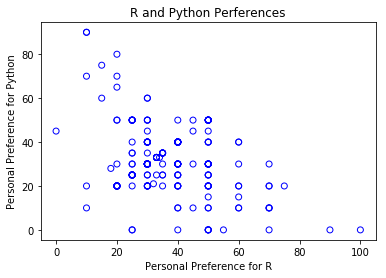

In [112]:
                     
# single scatter plot example
fig, axis = plt.subplots()
axis.set_xlabel('Personal Preference for R')
axis.set_ylabel('Personal Preference for Python')
plt.title('R and Python Perferences')
scatter_plot = axis.scatter(survey_df['My_R'], 
    survey_df['My_Python'],
    facecolors = 'none', 
    edgecolors = 'blue') 
plt.savefig('plot-scatter-r-python.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

survey_df_labels = [
    'Personal Preference for Java/Scala/Spark',
    'Personal Preference for Java/Script/HTML/CSS',
    'Personal Preference for Python',
    'Personal Preference for R',
    'Personal Preference for SAS',
    'Professional Java/Scala/Spark',
    'Professional JavaScript/HTML/CSS',
    'Professional Python',
    'Professional R',
    'Professional SAS',
    'Industry Java/Scala/Spark',
    'Industry Java/Script/HTML/CSS',
    'Industry Python',
    'Industry R',
    'Industry SAS'        
]    



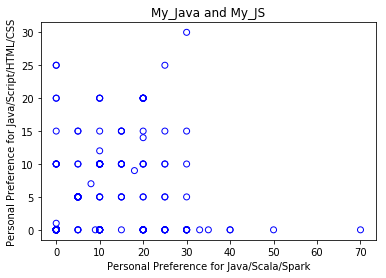

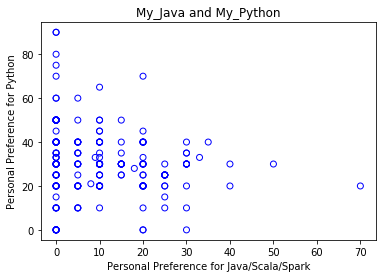

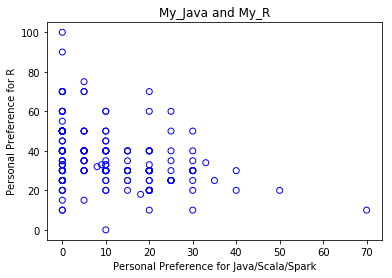

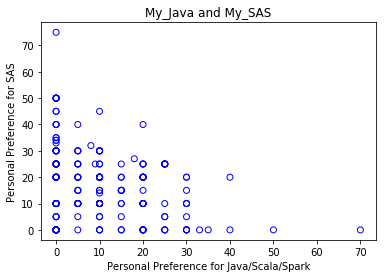

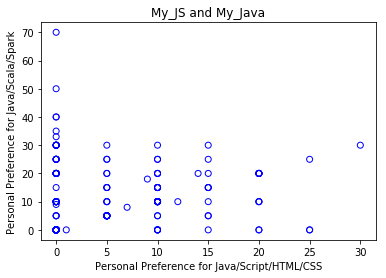

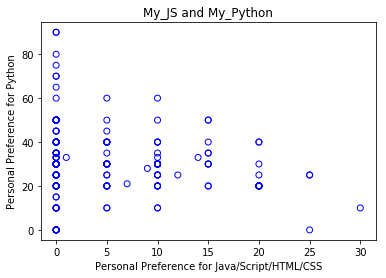

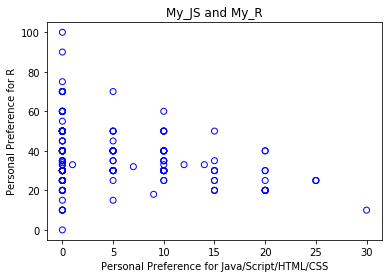

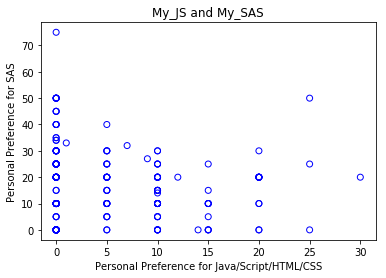

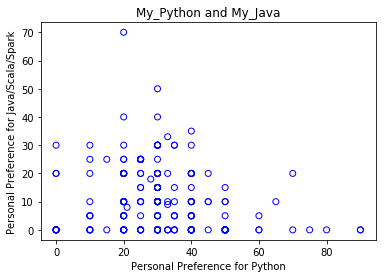

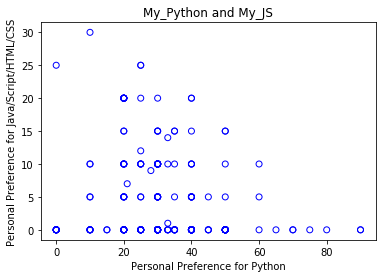

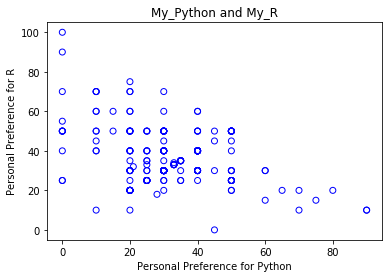

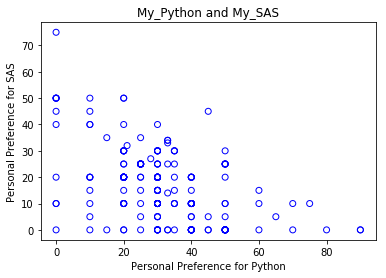

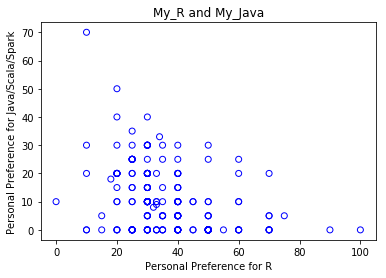

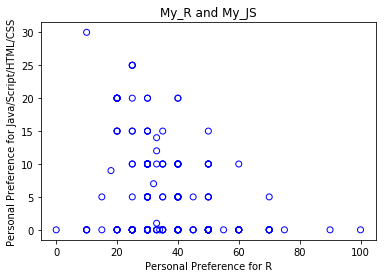

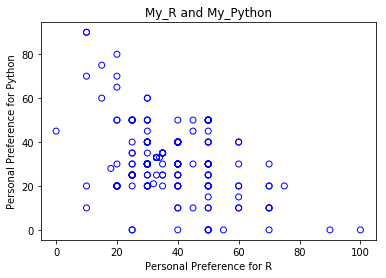

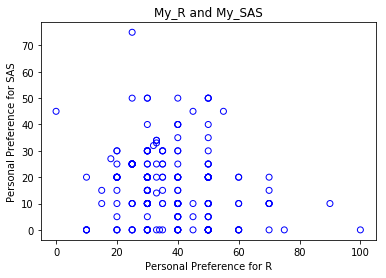

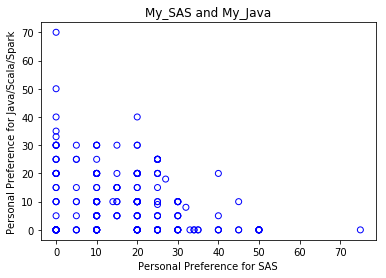

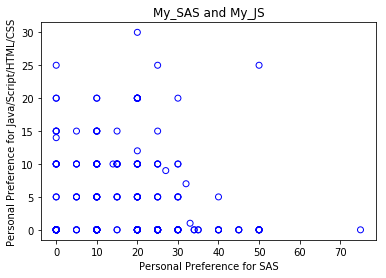

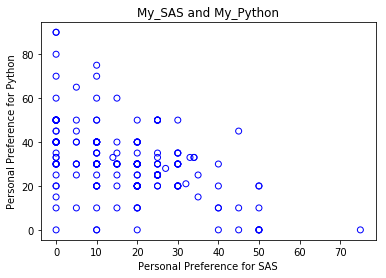

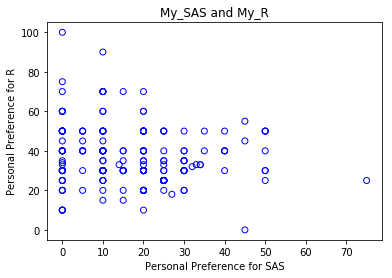

In [113]:
# create a set of scatter plots for personal preferences
for i in range(5):
    for j in range(5):
        if i != j:
            file_title = survey_df.columns[i] + '_and_' + survey_df.columns[j]
            plot_title = survey_df.columns[i] + ' and ' + survey_df.columns[j]
            fig, axis = plt.subplots()
            axis.set_xlabel(survey_df_labels[i])
            axis.set_ylabel(survey_df_labels[j])
            plt.title(plot_title)
            scatter_plot = axis.scatter(survey_df[survey_df.columns[i]], 
            survey_df[survey_df.columns[j]],
            facecolors = 'none', 
            edgecolors = 'blue') 
            plt.savefig(file_title + '.pdf', 
                bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
                orientation='portrait', papertype=None, format=None, 
                transparent=True, pad_inches=0.25, frameon=None)  


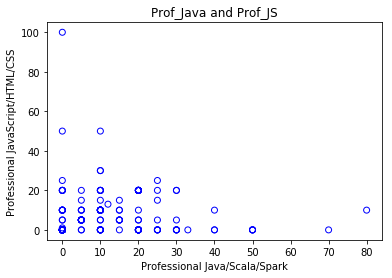

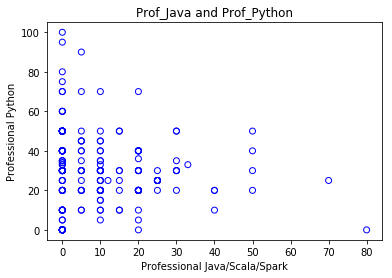

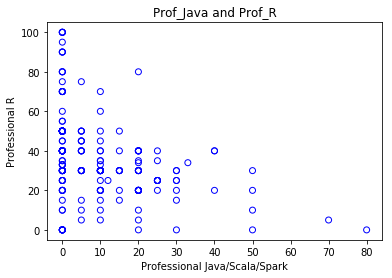

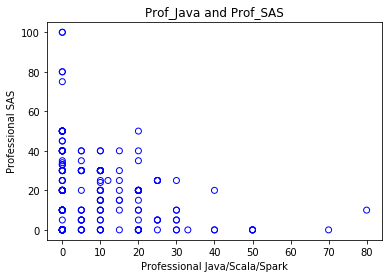

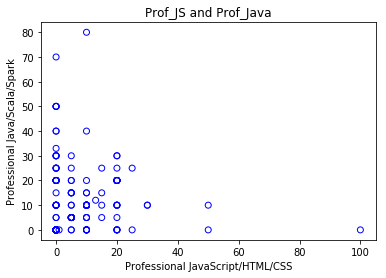

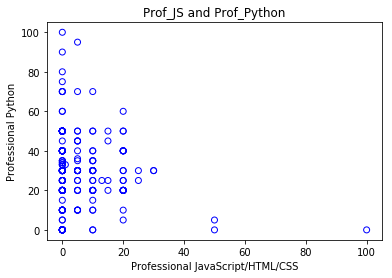

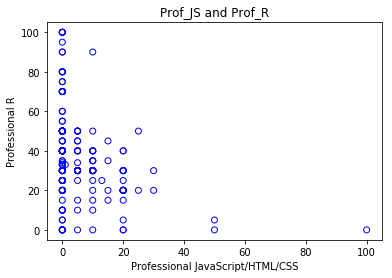

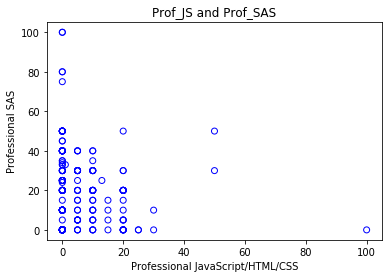

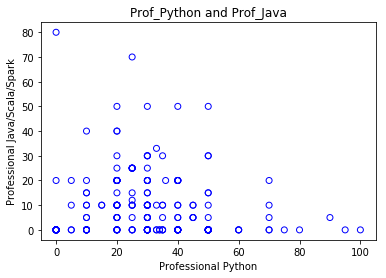

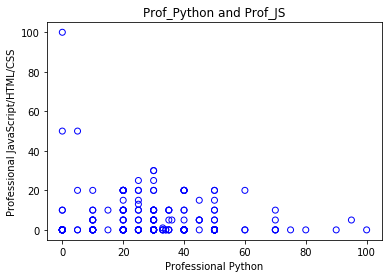

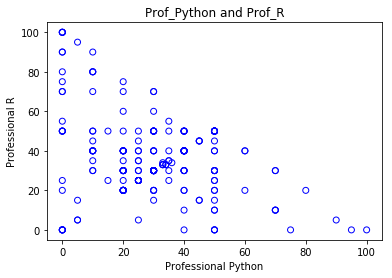

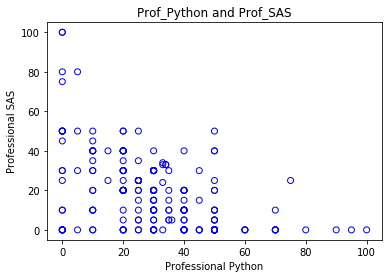

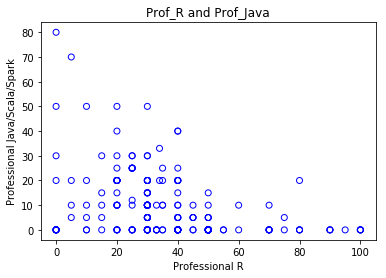

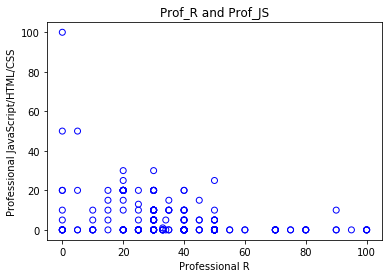

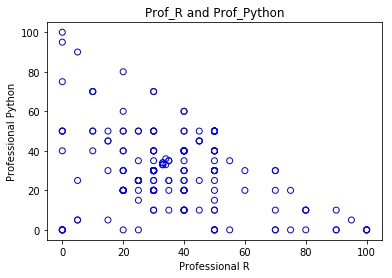

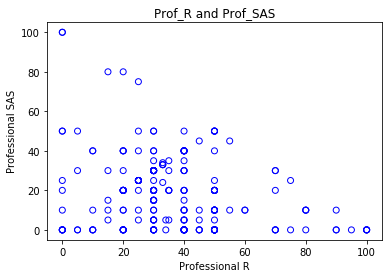

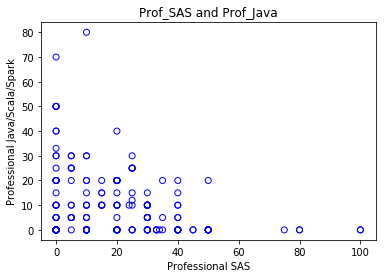

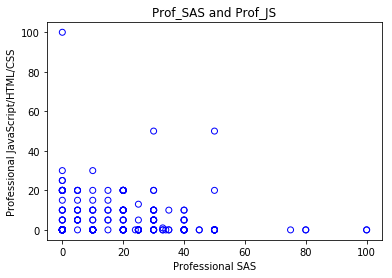

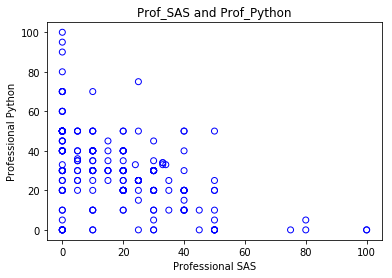

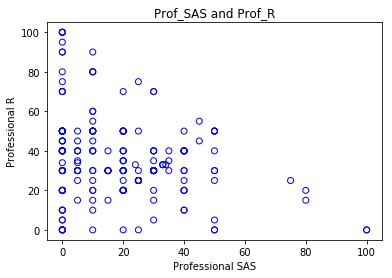

In [17]:
# create a set of scatter plots for professional preferences
for i in range(5,10):
    for j in range(5,10):
        if i != j:
            file_title = survey_df.columns[i] + '_and_' + survey_df.columns[j]
            plot_title = survey_df.columns[i] + ' and ' + survey_df.columns[j]
            fig, axis = plt.subplots()
            axis.set_xlabel(survey_df_labels[i])
            axis.set_ylabel(survey_df_labels[j])
            plt.title(plot_title)
            scatter_plot = axis.scatter(survey_df[survey_df.columns[i]], 
            survey_df[survey_df.columns[j]],
            facecolors = 'none', 
            edgecolors = 'blue') 
            plt.savefig(file_title + '.pdf', 
                bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
                orientation='portrait', papertype=None, format=None, 
                transparent=True, pad_inches=0.25, frameon=None)  


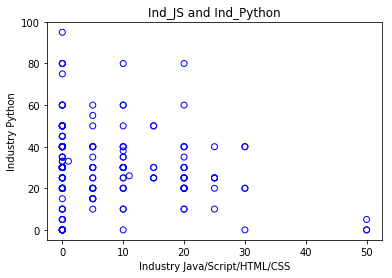

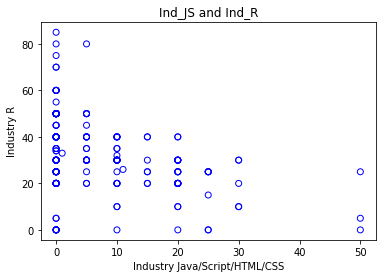

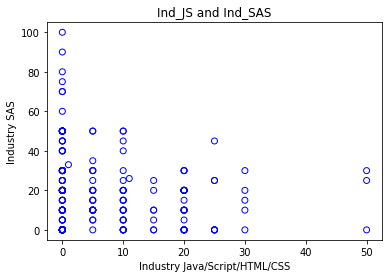

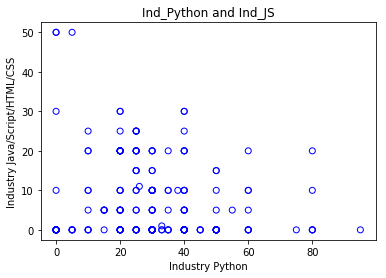

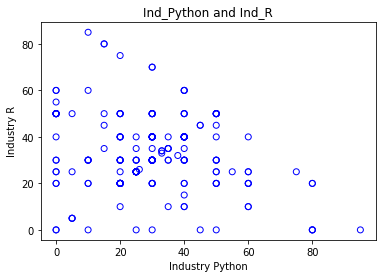

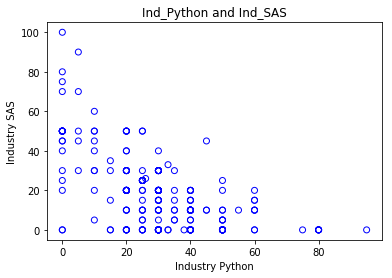

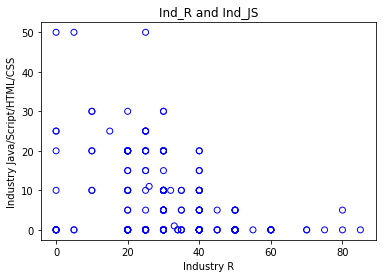

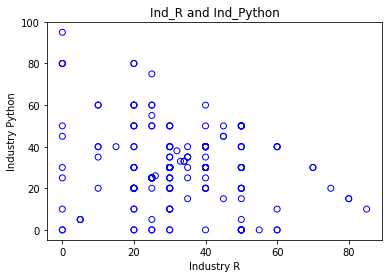

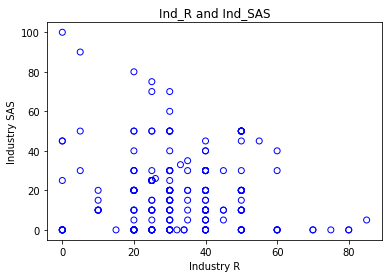

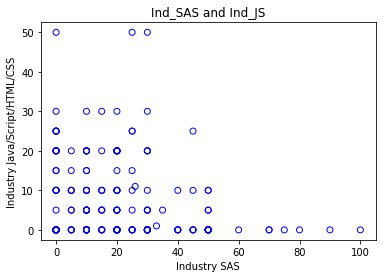

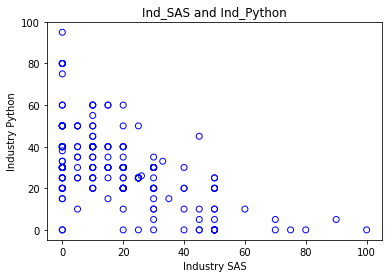

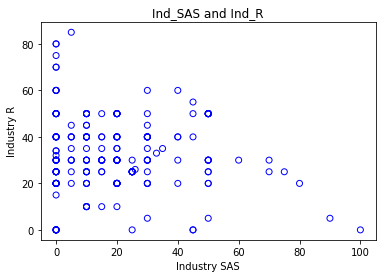

In [18]:
# create a set of scatter plots for industry preferences
for i in range(11,15):
    for j in range(11,15):
        if i != j:
            file_title = survey_df.columns[i] + '_and_' + survey_df.columns[j]
            plot_title = survey_df.columns[i] + ' and ' + survey_df.columns[j]
            fig, axis = plt.subplots()
            axis.set_xlabel(survey_df_labels[i])
            axis.set_ylabel(survey_df_labels[j])
            plt.title(plot_title)
            scatter_plot = axis.scatter(survey_df[survey_df.columns[i]], 
            survey_df[survey_df.columns[j]],
            facecolors = 'none', 
            edgecolors = 'blue') 
            plt.savefig(file_title + '.pdf', 
                bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
                orientation='portrait', papertype=None, format=None, 
                transparent=True, pad_inches=0.25, frameon=None)  

<Figure size 432x288 with 0 Axes>

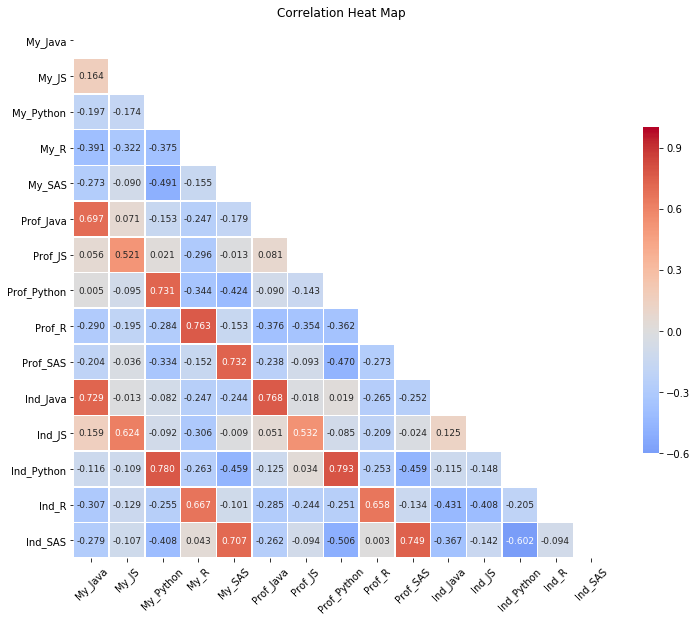

In [19]:

# examine intercorrelations among software preference variables
# with correlation matrix/heat map
corr_chart(df_corr = software_df) 

In [20]:
# descriptive statistics for software preference variables
print('\nDescriptive statistics for survey data ---------------')
print(software_df.describe())



Descriptive statistics for survey data ---------------
          My_Java       My_JS   My_Python        My_R      My_SAS   Prof_Java  \
count  207.000000  207.000000  207.000000  207.000000  207.000000  207.000000   
mean    10.135266    4.797101   31.304348   37.125604   16.637681    9.251208   
std     11.383477    6.757764   15.570982   14.576003   13.626400   13.167505   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000   20.000000   30.000000    5.000000    0.000000   
50%      9.000000    0.000000   30.000000   35.000000   15.000000    5.000000   
75%     20.000000   10.000000   40.000000   50.000000   25.000000   15.000000   
max     70.000000   30.000000   90.000000  100.000000   75.000000   80.000000   

          Prof_JS  Prof_Python      Prof_R    Prof_SAS    Ind_Java  \
count  207.000000   207.000000  207.000000  207.000000  207.000000   
mean     5.840580    30.028986   36.415459   18.463768   11.942029   
std 

In [22]:

# descriptive statistics for one variable
print('\nDescriptive statistics for courses completed ---------------')
print(survey_df['Courses_Completed'].describe())



Descriptive statistics for courses completed ---------------
count    187.000000
mean       6.342246
std        3.170849
min        1.000000
25%        4.000000
50%        6.000000
75%        9.000000
max       12.000000
Name: Courses_Completed, dtype: float64


In [24]:
# graduation date counts
grad_date= list(valid_survey_input.Graduate_Date)
from collections import Counter 
Counter(grad_date)


Counter({nan: 3,
         'Spring 2018': 30,
         'Fall 2018': 20,
         'Fall 2017': 14,
         'Summer 2019': 3,
         'Summer 2018': 11,
         'Winter 2019': 11,
         '2020 or Later': 5,
         'Winter 2018': 25,
         'Fall 2019': 5,
         'Fall 2016': 13,
         'Summer 2017': 14,
         'Spring 2019': 9,
         'Spring 2017': 19,
         'Winter 2017': 25})

In [145]:

# descriptive statistics for interest in new courses
newcourse_df = survey_df.loc[:, 'Python_Course_Interest':'Systems_Analysis_Course_Interest']

print('\nDescriptive statistics for new courses  ---------------')
print(newcourse_df.describe())


Descriptive statistics for new courses  ---------------
       Python_Course_Interest  Foundations_DE_Course_Interest  \
count              206.000000                      200.000000   
mean                73.529126                       58.045000   
std                 29.835429                       32.588079   
min                  0.000000                        0.000000   
25%                 53.000000                       29.500000   
50%                 82.500000                       60.000000   
75%                100.000000                       89.250000   
max                100.000000                      100.000000   

       Analytics_App_Course_Interest  Systems_Analysis_Course_Interest  
count                     203.000000                        200.000000  
mean                       55.201970                         53.630000  
std                        34.147954                         33.539493  
min                         0.000000                          0.0

In [28]:

# ----------------------------------------------------------
# transformation code added with version v005
# ----------------------------------------------------------
# transformations a la Scikit Learn
# documentation at http://scikit-learn.org/stable/auto_examples/
#                  preprocessing/plot_all_scaling.html#sphx-glr-auto-
#                  examples-preprocessing-plot-all-scaling-py
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [29]:

# transformations a la Scikit Learn
# select variable to examine, eliminating missing data codes
X = survey_df['Courses_Completed'].dropna()


C:\Users\Jimmy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


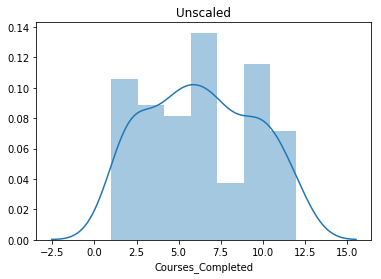

In [30]:

# Seaborn provides a convenient way to show the effects of transformations
# on the distribution of values being transformed
# Documentation at https://seaborn.pydata.org/generated/seaborn.distplot.html

unscaled_fig, ax = plt.subplots()
sns.distplot(X).set_title('Unscaled')
unscaled_fig.savefig('Transformation-Unscaled' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  


C:\Users\Jimmy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


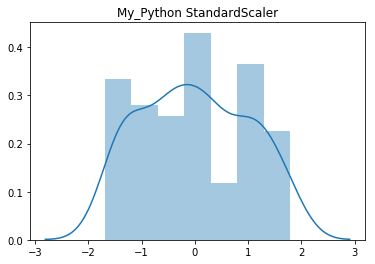

In [32]:
standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(np.array(X).reshape(-1,1))).set_title('My_Python StandardScaler')
standard_fig.savefig('Transformation-StandardScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

C:\Users\Jimmy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


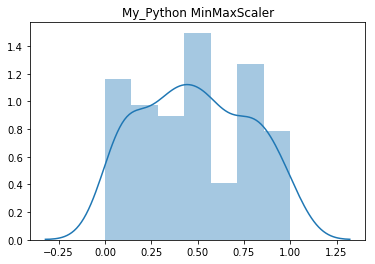

In [33]:
minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(np.array(X).reshape(-1,1))).set_title('My_Python MinMaxScaler')
minmax_fig.savefig('Transformation-MinMaxScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 

C:\Users\Jimmy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


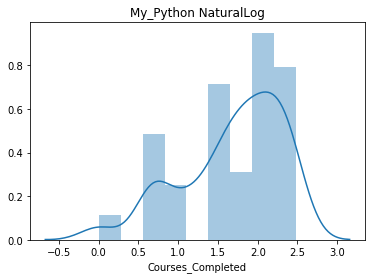

In [34]:
log_fig, ax = plt.subplots()
sns.distplot(np.log(X)).set_title('My_Python NaturalLog')
log_fig.savefig('Transformation-NaturalLog' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)


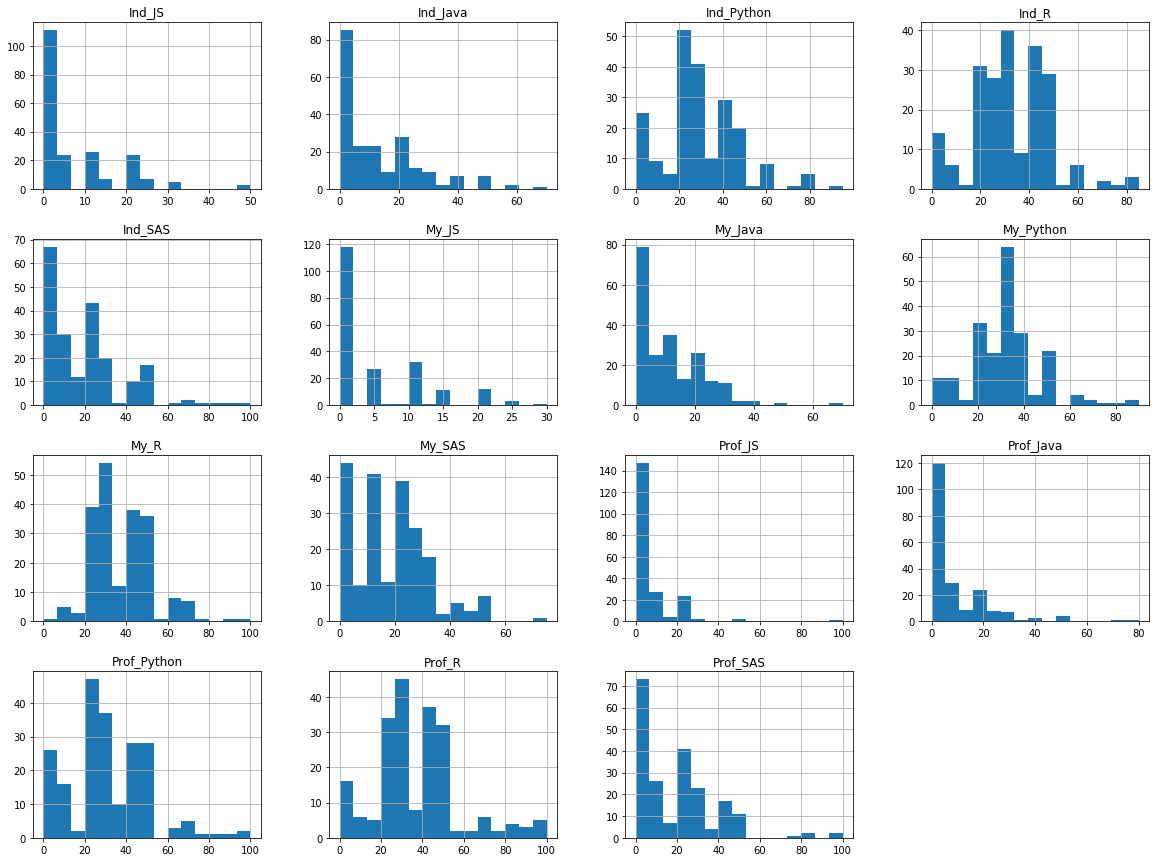

In [43]:
# histogram of score distribution for each software
software_df.hist(bins = 15, figsize = (20, 15))
plt.show()

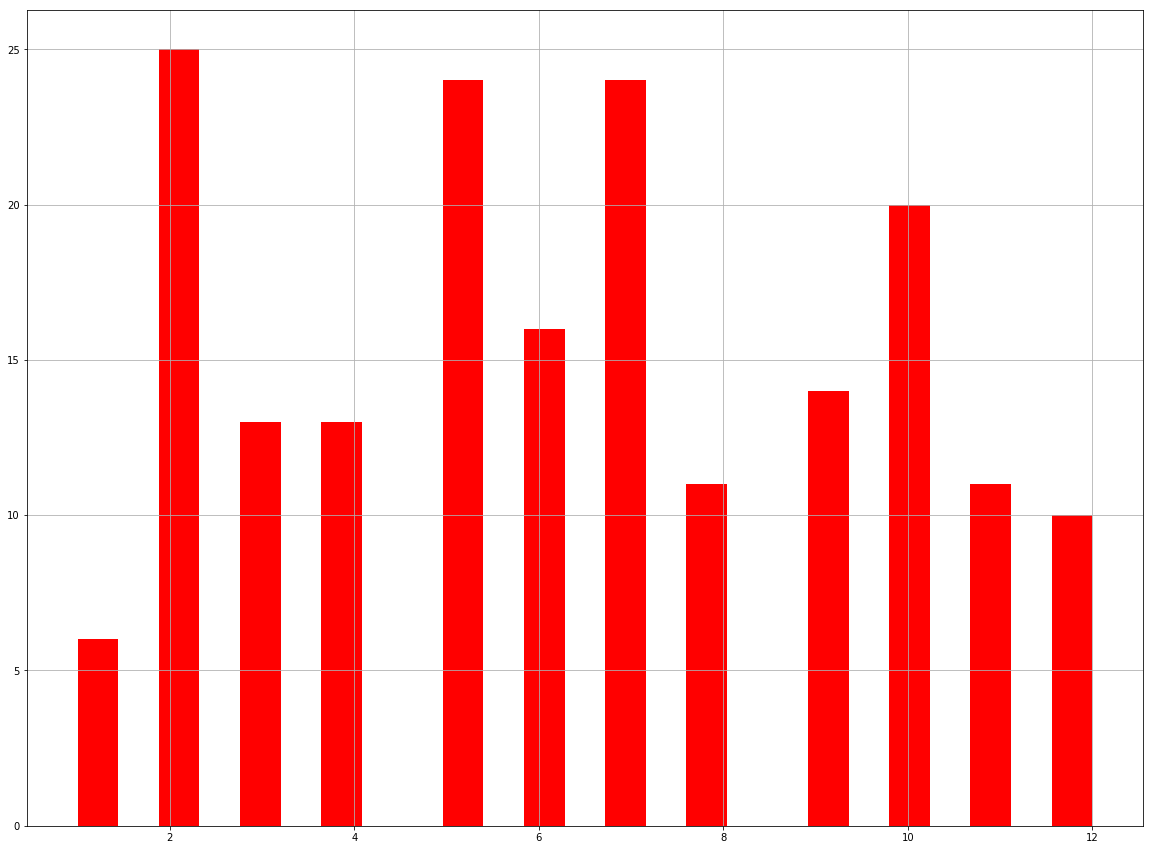

In [41]:
survey_df['Courses_Completed'].hist(bins = 25, figsize = (20, 15),color="red")
plt.show()

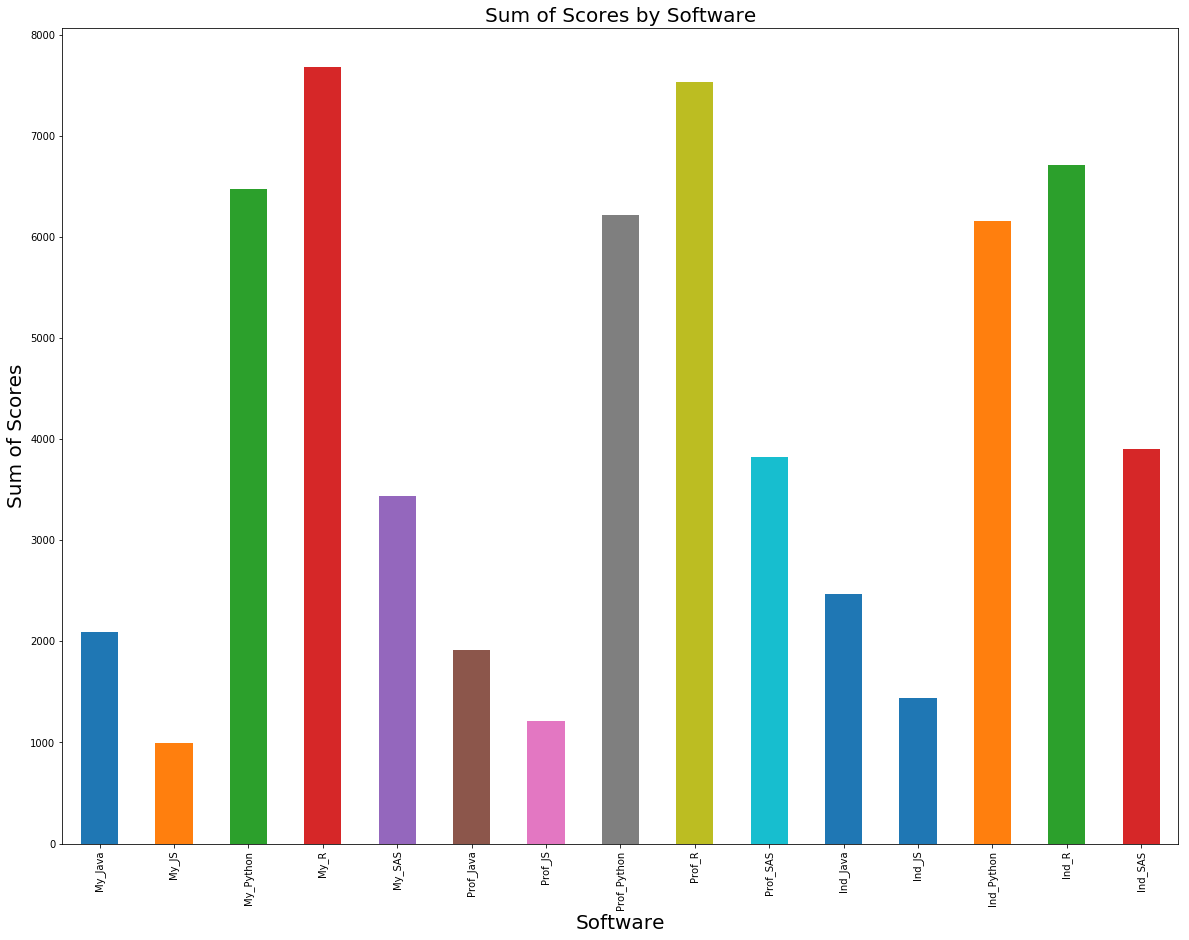

In [57]:
# bar plot that shows sum of scores given to software
software_df.sum().plot( kind='bar', figsize = (20, 15) )
plt.title("Sum of Scores by Software", fontsize=20)
plt.xlabel('Software', fontsize=20)
plt.ylabel('Sum of Scores', fontsize=20)

plt.show()

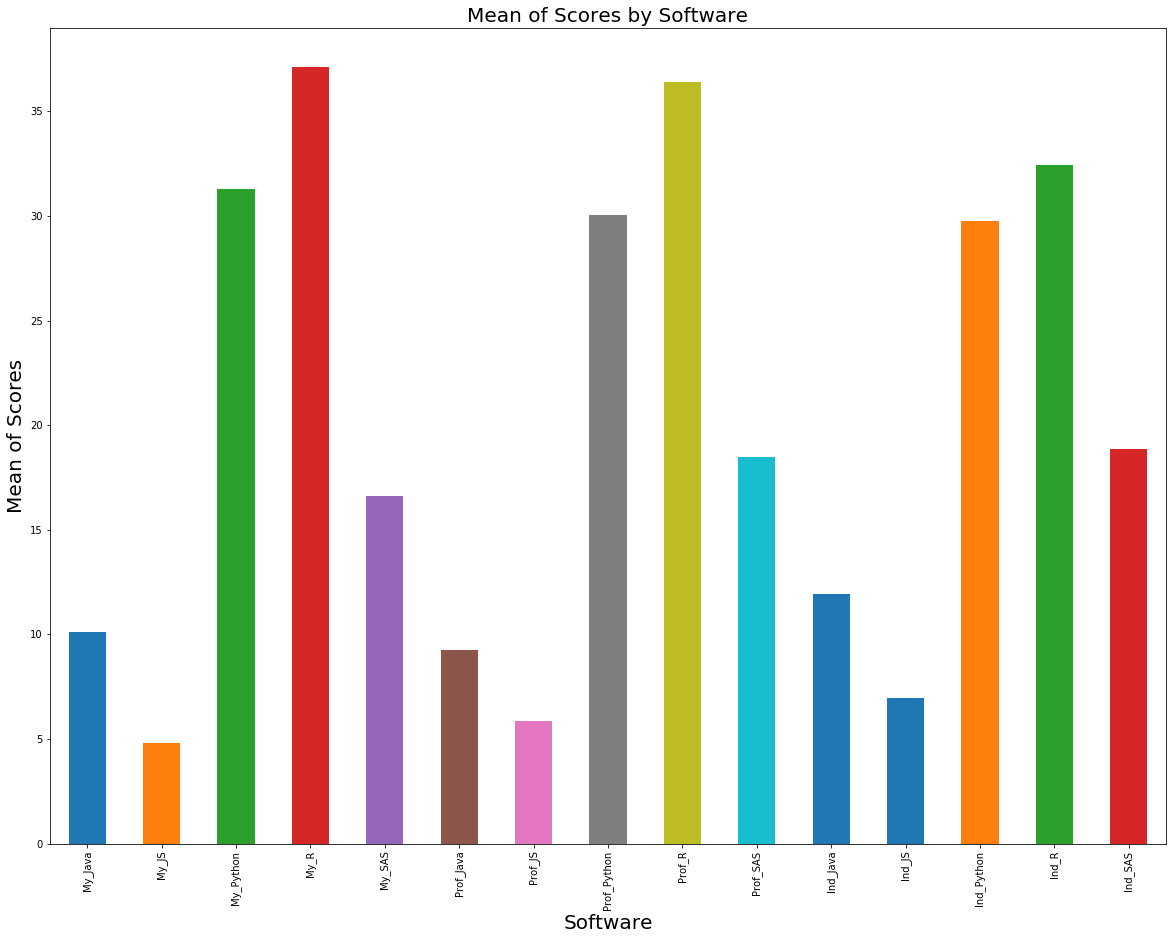

In [84]:
# bar plot that shows mean of scores given to software
software_df.mean().plot( kind='bar', figsize = (20, 15) )
plt.title("Mean of Scores by Software", fontsize=20)
plt.xlabel('Software', fontsize=20)
plt.ylabel('Mean of Scores', fontsize=20)

plt.show()

In [78]:
#Sum of software type
Java_sum= software_df.My_Java.sum() + software_df.Prof_Java.sum()+ software_df.Ind_Java.sum()
JS_sum= software_df.My_JS.sum() + software_df.Prof_JS.sum()+ software_df.Ind_JS.sum()
Python_sum= software_df.My_Python.sum() + software_df.Prof_Python.sum()+ software_df.Ind_Python.sum()
R_sum= software_df.My_R.sum() + software_df.Prof_R.sum()+ software_df.Ind_R.sum()
SAS_sum= software_df.My_SAS.sum() + software_df.Prof_SAS.sum()+ software_df.Ind_SAS.sum()

list={'Name':['Java','JS','Python','R','SAS'],
      'Sum':[Java_sum,JS_sum,Python_sum,R_sum,SAS_sum]}
software_type_df= (pd.DataFrame(list))
software_type_df

,Name,Sum
0,Java,6485
1,JS,3644
2,Python,18859
3,R,21937
4,SAS,11175


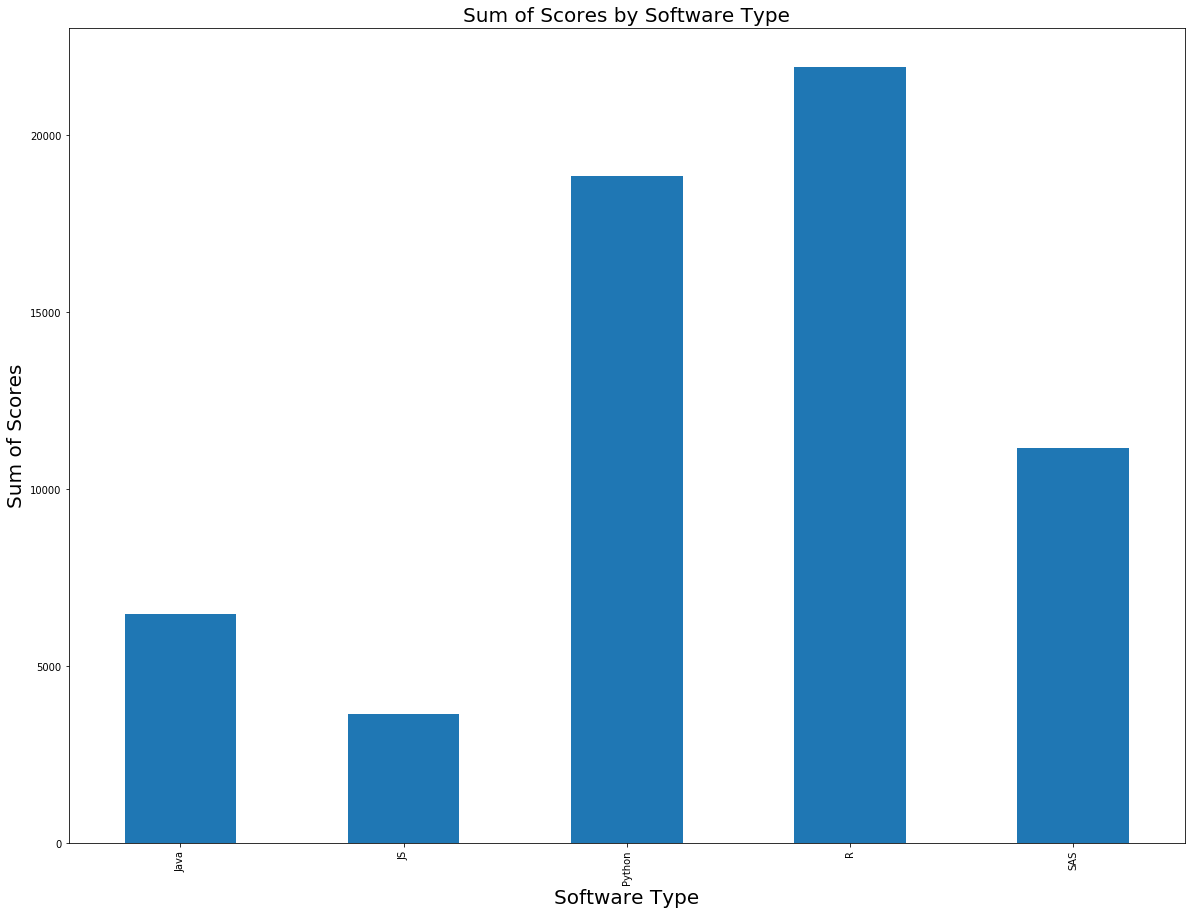

In [87]:
#plot of sum by type of software
software_type_df.plot( kind='bar', figsize = (20, 15),legend = False  )
plt.title("Sum of Scores by Software Type", fontsize=20)
plt.xlabel('Software Type', fontsize=20)
plt.ylabel('Sum of Scores', fontsize=20)
plt.xticks(np.arange(5), ('Java','JS','Python','R','SAS'))

plt.show()

In [135]:
# define subset DataFrame for analysis of software preferences and courses completed
course_comp_df = survey_df.loc[:,'My_Java':'Courses_Completed']
cc_software=course_comp_df.groupby("Courses_Completed").sum().loc[:,'My_Java':'Ind_SAS']

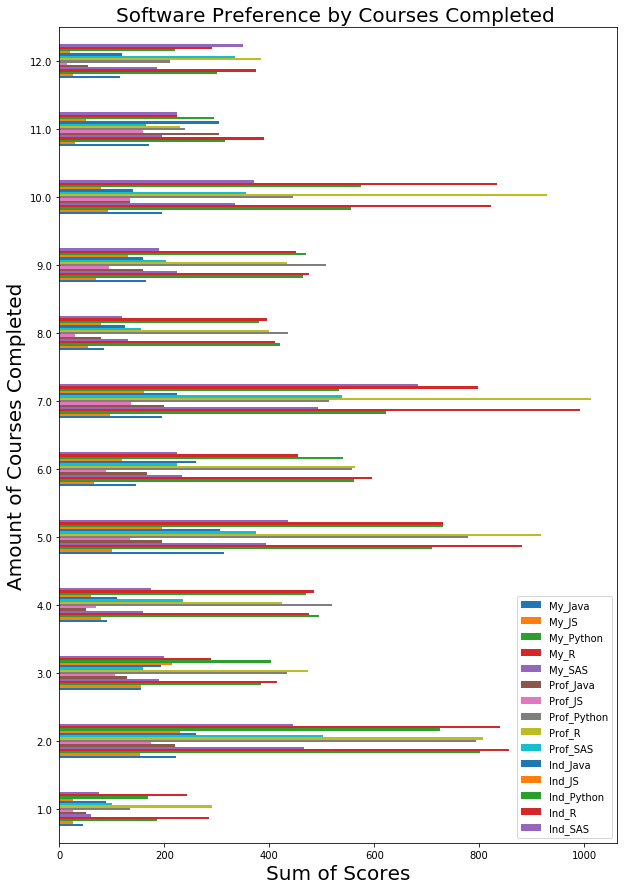

In [137]:
cc_software.plot( kind='barh', figsize = (10,15),legend = True  )
plt.title("Software Preference by Courses Completed ", fontsize=20)
plt.xlabel('Sum of Scores', fontsize=20)
plt.ylabel('Amount of Courses Completed', fontsize=20)

plt.show()

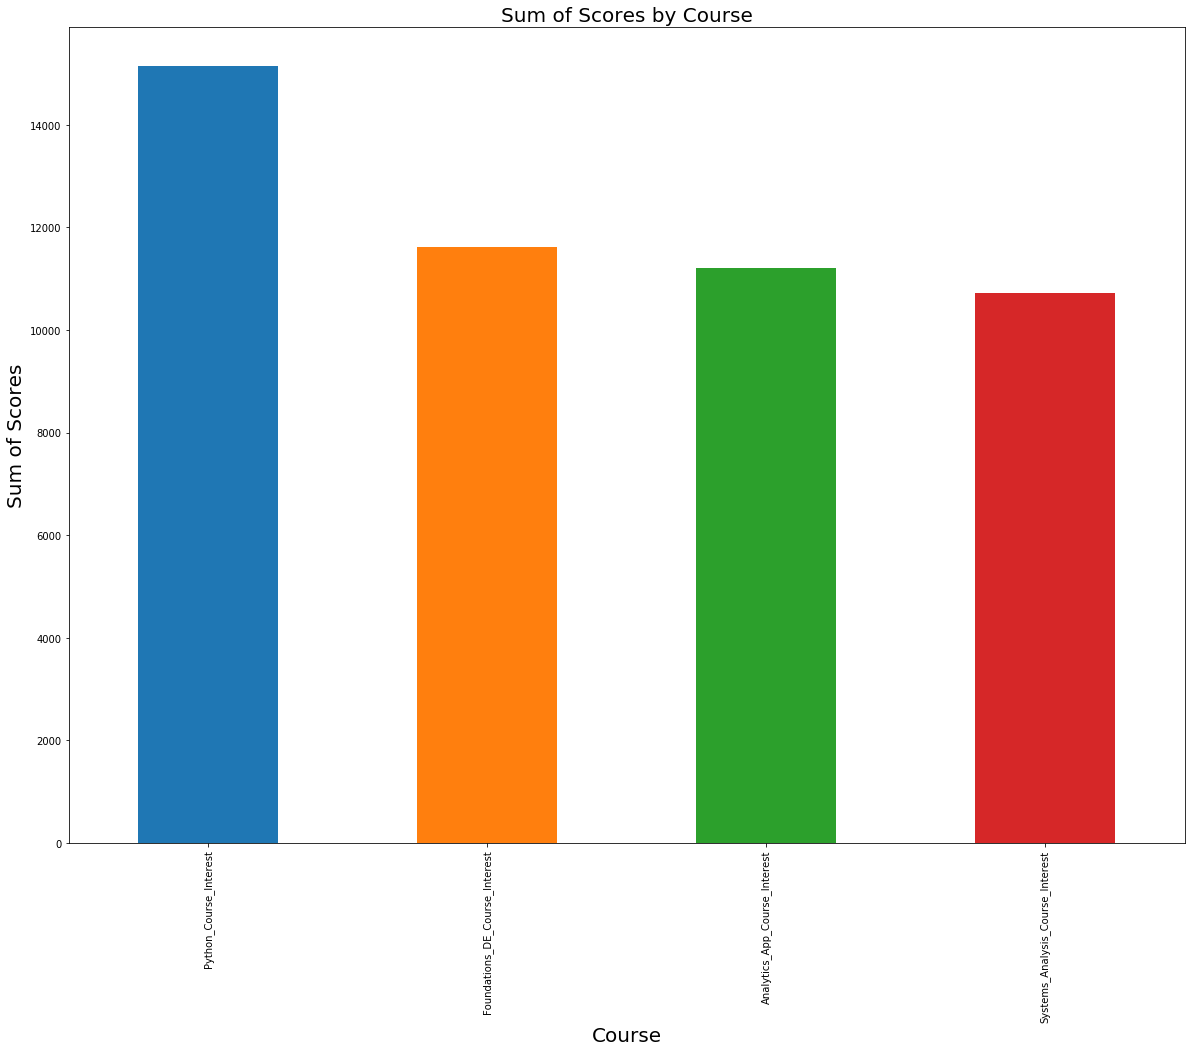

In [146]:
#Analysis of course preference

newcourse_df.sum().plot( kind='bar', figsize = (20, 15) )
plt.title("Sum of Scores by Course", fontsize=20)
plt.xlabel('Course', fontsize=20)
plt.ylabel('Sum of Scores', fontsize=20)

plt.show()

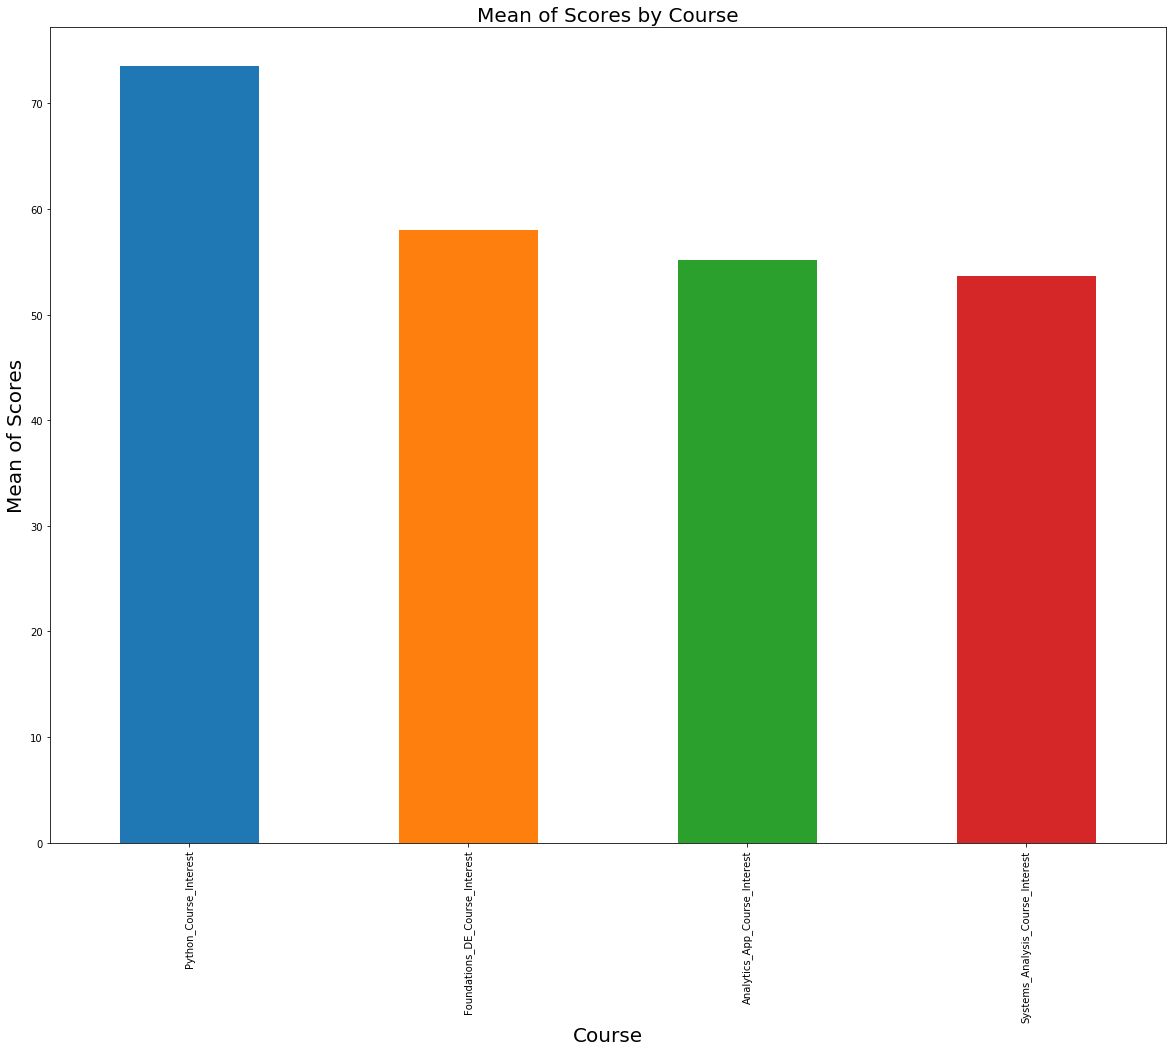

In [147]:

newcourse_df.mean().plot( kind='bar', figsize = (20, 15) )
plt.title("Mean of Scores by Course", fontsize=20)
plt.xlabel('Course', fontsize=20)
plt.ylabel('Mean of Scores', fontsize=20)

plt.show()

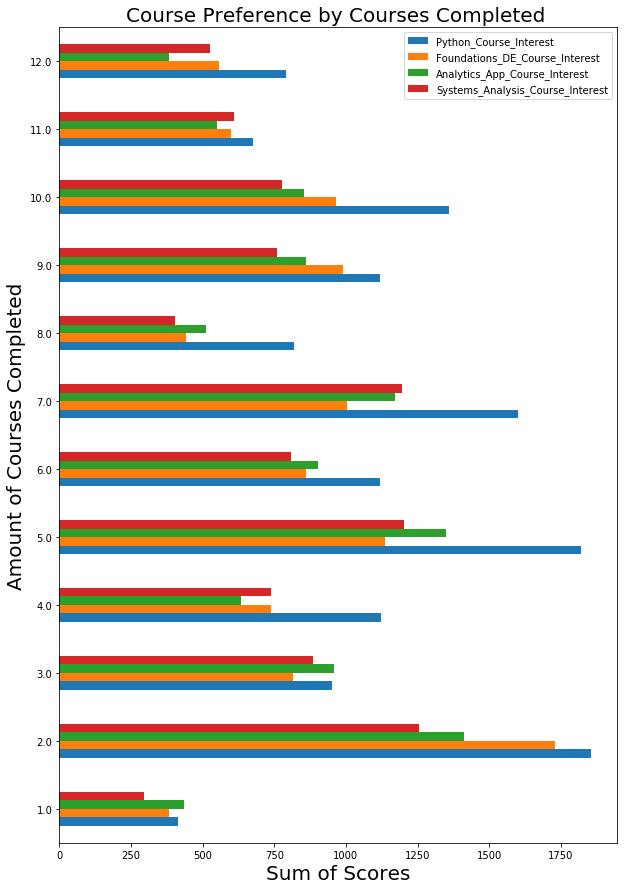

In [148]:
cc_preference=course_comp_df.groupby("Courses_Completed").sum().loc[:,
                    'Python_Course_Interest':'Systems_Analysis_Course_Interest']
cc_preference.plot( kind='barh', figsize = (10,15),legend = True  )
plt.title("Course Preference by Courses Completed ", fontsize=20)
plt.xlabel('Sum of Scores', fontsize=20)
plt.ylabel('Amount of Courses Completed', fontsize=20)

plt.show()